In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = [20, 10]

In [4]:
# How to open a table
T2_table = np.genfromtxt('/Users/kalgi/Desktop/stellar wind /STELLARWIND.csv', delimiter=",", usecols=(1,4,7,16,19,25,26,27,35,36,37,28,38,31), skip_header=2) 
T2_table = np.transpose(T2_table)

T2_table_onlynames = np.genfromtxt('/Users/kalgi/Desktop/stellar wind /STELLARWIND.csv', delimiter=",", usecols=(2),skip_header=2, dtype=str) 
T2_table_onlynames = np.transpose(T2_table_onlynames)

# Read the parameters of the table
names = T2_table_onlynames #names of the planets
plt_mass=T2_table[0] #in earth mass
plt_rad=T2_table[1] #in earth radii
plt_den=T2_table[2] #in g/cm^3
st_mass=T2_table[3] #in solar mass
st_rot=T2_table[4] #in days
st_cotemp= T2_table[5] #in MK
orb_rad= T2_table[6] #in km
plt_rad_km= T2_table[7] #in km
M_a_gs= T2_table[8] #Mass loss in g/s
M_a_gGyr= T2_table[9] #Mass loss in g/1Gyr
M_a_MEGyr= T2_table[10] #Mass loss in Earth Mass/Gyr
plt_mass_kg= T2_table[11] #planet mass in kg
M_a_percent = T2_table[12] #mass percent of atmosphere lost in relation to planets mass (atmospere lost/planet mass X100)
p_atm= T2_table[13] #percent Earth atmosphere

#CALCULATING CORONAL TEMPERATURE
cond3 = np.where(st_rot > 18.9) 
cond4 = np.where(st_rot < 18.9) 

coronal_temp_rot = 1.5*(27/st_rot[cond3])**1.2
coronal_temp_rot1 = 1.98*(27/st_rot[cond4])**0.37

#CALCULATING WIND VELOCITY
a_naught_new= 180*(st_cotemp*10**6/(2*10**6))**(1/2) #calculation of critical velocity in km/s
r_s_new= (2*10**11)*(st_mass/1)*(st_cotemp*10**6/(2*10**6))**(-1) #calculation of critical radius in cm

cond1 = np.where(orb_rad*10**5 < r_s_new) 
cond2 = np.where(orb_rad*10**5 > r_s_new) 

large_radii = 2*a_naught_new[cond2]*np.log(orb_rad[cond2]*10**5/r_s_new[cond2])**0.5 
small_radii = a_naught_new[cond1]*np.exp(3/2)*np.exp((-2*r_s_new[cond1])/(orb_rad[cond1]*10**5))

#CALCULATING WIND DENSITY
M_H= 1.6726231E-24 #mass of the proton in grams
P_sun= 27.2 #rotation period of Sun in day
r_sun=6.96E10 #radius of the sun in cm

wind_density= ((3.3E5*(orb_rad*10**5/r_sun)**-2 + 4.16E6*(orb_rad*10**5/r_sun)**-4 + 8.0E7*(orb_rad*10**5/r_sun)**-6)*(M_H/2)*((P_sun/st_rot)**0.6))

#CALCULATING ATMOSPHERIC MASS LOSS
M_a_1= 6.28*(plt_rad_km[cond2]**2)*0.3*(wind_density[cond2]*10**15)*(large_radii)
M_a_2= 6.28*(plt_rad_km[cond1]**2)*0.3*(wind_density[cond1]*10**15)*(small_radii)

#CALCULATING PERCENT ATMOSPHERE
p_atmosphere= (p_atm/100)*plt_mass_kg

#PRINTING VALUES
print('initial atmosphere mass')
print(p_atmosphere)
print('wind velocities for Kepler-138d, K2-3d, GJ3053b, K2-3c, GJ9827d, K2-18b, GJ97658b')
print(large_radii) #Kepler-138d, K2-3d, GJ3053b, K2-3c, GJ9827d, K2-18b, GJ97658b
print('wind velocities for GJ1132b, 55Cnce, GJ1214b')
print(small_radii) #GJ1132b, 55Cnce, GJ1214b
print('wind densities for GJ1132b, Kepler-138d, K2-3d, GJ3053b, K2-3c, 55Cnce, GJ9827d, K2-18b, GJ97658b, GJ1214b')
print(wind_density) #GJ1132b, Kepler-138d, K2-3d, GJ3053b, K2-3c, 55Cnce, GJ9827d, K2-18b, GJ97658b, GJ1214b
print('atmospheric mass loss rate for Kepler-138d, K2-3d, GJ3053b, K2-3c, GJ9827d, K2-18b, GJ97658b in g/s')
print(M_a_1)
print('atmospheric mass loss rate for GJ1132b, 55Cnce, GJ1214b in g/s')
print(M_a_2)
print('atmospheric mass loss 5 Gyr in kg for Kepler-138d, K2-3d, GJ3053b, K2-3c, GJ9827d, K2-18b, GJ97658b')
print((M_a_1*1.5768e+17)/1000) 
print('atmospheric mass loss 5 Gyr in kg for GJ1132b, 55Cnce, GJ1214b')
print((M_a_2*1.5768e+17)/1000)


initial atmosphere mass
[4.955e+21 3.820e+20 1.850e+22 4.170e+22 3.145e+23 3.381e+24 6.025e+23
 4.264e+24 4.240e+24 1.870e+24       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan]
wind velocities for Kepler-138d, K2-3d, GJ3053b, K2-3c, GJ9827d, K2-18b, GJ97658b
[659.96845418 389.33010677 147.21070238 357.54237964 563.17858875
 416.9940419  280.38831418]
wind velocities for GJ1132b, 55Cnce, GJ1214b
[19.62486672 14.89090132 25.20406785]
wind densities for GJ1132b, Kepler-138d, K2-3d, GJ3053b, K2-3c, 55Cnce, GJ9827d, K2-18b, GJ97658b, GJ1214b
[4.33146214e-20 4.61575531e-22 1.09189332e-22 2.74161556e-22
 2.40699619e-22 8.06990113e-20 2.89697096e-21 2.42619311e-22
 7.92150214e-22 6.52855342e-20            nan            nan


Text(0.5, 0, 'Planet Mass [M$_{\\oplus}$]')

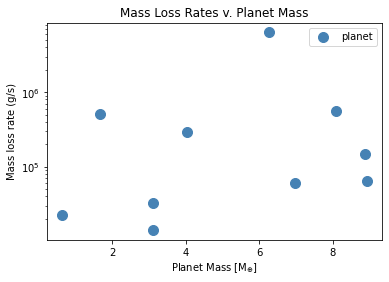

In [5]:
plt.scatter(plt_mass, M_a_gs, marker='o',s=100,color='SteelBlue', label='planet')
plt.legend(loc="upper right")
plt.title('Mass Loss Rates v. Planet Mass')
plt.yscale('log')
plt.ylabel('Mass loss rate (g/s)')
plt.xlabel('Planet Mass [M$_{\oplus}$]')
